In [56]:
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from network_models.erdos_renyi_network import erdos_renyi_network
from network_models.scale_free_network import scale_free_network

In [57]:
def make_nx_graph(N, gamma, c):
    # Outputs the networkx.Graph of the graph
    alpha = 1 / (gamma - 1)
    w = np.arange(1., N + 1)**(-alpha)
    w *= c * N / w.sum()
    s = np.sum(w)
    m = (np.dot(w, w)/s)**2 + s
    m = int(m / 2)
    wsum = np.cumsum(w)
    wsum = np.insert(wsum, 0, 0)
    wsum = wsum / wsum[-1]
    I = np.digitize(np.random.rand(m, 1), wsum)
    J = np.digitize(np.random.rand(m, 1), wsum)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(tuple(zip(I.reshape(m,), J.reshape(m,))))
    return G

In [58]:
G = make_nx_graph(10000, 2.5, 3)

In [69]:
N = 100000
c = 7
gamma = 2.5
G = scale_free_network({
    'num_nodes': N,
    'mean_degree': c,
    'exponent': gamma,
})
# G = erdos_renyi_network({
#     'num_nodes': 1000,
#     'mean_degree': 4,
# })

In [55]:
G = nx.barabasi_albert_graph(100000, 2)
c = np.mean([d for _, d in G.degree])
c

3.99992

In [53]:
len(G)

100000

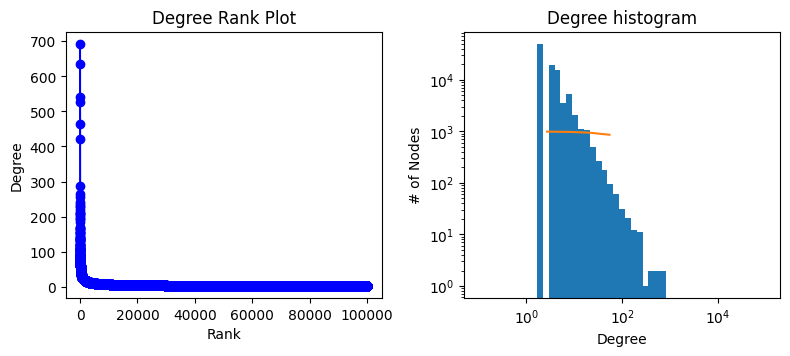

In [32]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.hist(degree_sequence, bins=np.logspace(np.log10(0.1), np.log10(len(G)), 50))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(np.exp(np.arange(1, np.log10(len(G)))), 1000 - 2.5 * np.exp(np.arange(1, np.log10(len(G)))))

fig.tight_layout()
plt.show()

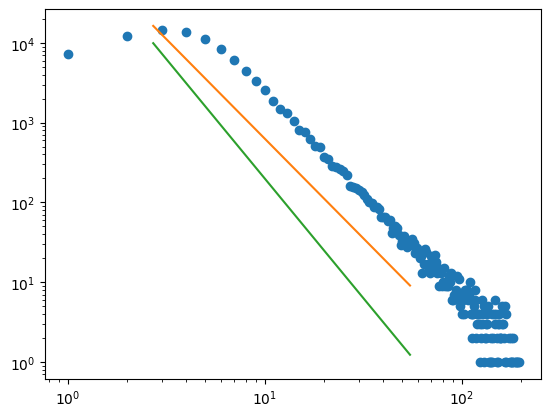

In [62]:
plt.loglog(nx.degree_histogram(G), 'o')
plt.plot(np.exp(np.arange(1, np.log10(len(G)))), 200000 * np.exp(-2.5 * np.arange(1, np.log10(len(G)))))
plt.plot(np.exp(np.arange(1, np.log10(len(G)))), 200000 * np.exp(-3 * np.arange(1, np.log10(len(G)))))

In [77]:
N = 100000
c = 7
gamma = 2.5
G1 = scale_free_network({
    'num_nodes': N,
    'mean_degree': c,
    'exponent': gamma,
})
G2 = scale_free_network({
    'num_nodes': N,
    'mean_degree': c,
    'exponent': gamma,
})
# G = erdos_renyi_network({
#     'num_nodes': 1000,
#     'mean_degree': 4,
# })

In [78]:
def find_component(node, connected_components):
    for i, component in enumerate(connected_components):
        if node in component:
            return i
    raise ValueError(f'Component for node {node} not found')

In [79]:
def cascade_remove_links(Ga, Gb):

    keep_going = True
    while keep_going:
        keep_going = False

        clusters_a = list(nx.connected_components(Ga))
        for edge in Gb.edges():
            if find_component(edge[0], clusters_a) != find_component(edge[1], clusters_a):
                keep_going = True
                Gb.remove_edge(*edge)

        clusters_b = list(nx.connected_components(Gb))
        for edge in Ga.edges():
            if find_component(edge[0], clusters_b) != find_component(edge[1], clusters_b):
                keep_going = True
                Ga.remove_edge(*edge)
    
    return Ga, Gb

In [80]:
t = 0
while True:
    G1, G2 = cascade_remove_links(G1, G2)
    ap1 = set(nx.articulation_points(G1))
    ap2 = set(nx.articulation_points(G2))
    ap = ap1.union(ap2)
    G1.remove_nodes_from(ap)
    G2.remove_nodes_from(ap)
    t += 1
    if not ap:
        break

In [81]:
t

4